In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xdata = pd.read_excel("QuadFormsData.xlsx", "Category A")
xdata = xdata.drop_duplicates(subset=["Citation Key"])
xdata = xdata.sort_values('Date')

In [4]:
xt=[]
yt = []
x=list(xdata['Date'])
y = list(xdata['CitationCount'])
for i in range(len(x)):
    if type(x[i]) ==  pd._libs.tslibs.timestamps.Timestamp:
        xt.append(x[i].timestamp())
        yt.append(y[i])

A = np.vstack([xt, np.ones(len(xt))]).T
A       
m, c = np.linalg.lstsq(A, yt, rcond=None)[0]

-2.119943794799273 4300.848407724592


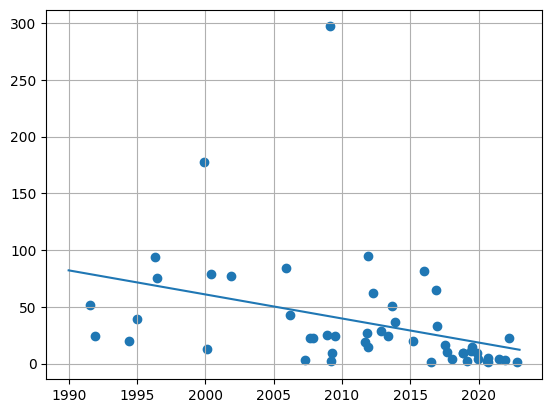

In [15]:
range_dates = max(xt) - min(xt)
min_xt = min(xt)
conv_factor = (365 * 24 * 3600)
zero_shifted_xt = [(a ) / conv_factor +1970 for a in xt]
plt.scatter(zero_shifted_xt, yt)


A = np.vstack([zero_shifted_xt, np.ones(len(xt))]).T
A       
m, c = np.linalg.lstsq(A, yt, rcond=None)[0]
print(m,c)

x1 = [1990,2023]
x2 = [1990*m+c,2023*m+c]
plt.grid()
plt.plot(x1,x2)